In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
def extractLines(filename, prefix):
    ret = [[] for k in prefix]
    with open(filename) as f:
        for line in f:
            line = line.strip()
            for idx, s in enumerate(prefix):
                if line.startswith(s):
                    ret[idx].append(line)
    return ret

In [3]:
def extractNums(linesList, pos=-1):
    ret = []
    for ll in linesList:
        ret.append([float(t.split()[pos]) for t in ll])
    return ret

In [28]:
def plot(zipLabels, nums, vlines=None, xlim=None, ylim=None, title=None, xlabel=None, ylabel=None):
    plt.figure(figsize=(8, 4))
    for idx, label in zipLabels:
        plt.plot(range(1, len(nums[idx]) + 1), nums[idx], label=label)
    plt.grid()
    plt.legend(loc=(1, 0))
    if vlines:
        for x in vlines:
            plt.axvline(x, c='black')
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)

# Results

In [5]:
labels = ["Training auPRC", "Testing auPRC", "Testing (ref) auPRC",
          "Training average score =", "Training average score (positive)",
          "Training average score (negative)",
          "Testing average score =", "Testing average score (positive)",
          "Testing average score (negative)",
          "Testing (ref) average score =", "Testing (ref) average score (positive)",
          "Testing (ref) average score (negative)",
          "Effective count", "Positive effective count", "Negative effective count"]

In [6]:
lines = extractLines("splice-site/auto/result-010.txt", labels)
nums = extractNums(lines)

'''
joint = [a + b + c + d + e
         for a, b, c, d, e in zip(numsL2, numsL2L3, numsL2L3_2, numsL2L3_3, numsL2L3L3)]
'''
joint1 = nums
vlines = []

In [9]:
lines = extractLines("splice-site/auto/result-002.txt", labels)
nums = extractNums(lines)

'''
joint = [a + b + c + d + e
         for a, b, c, d, e in zip(numsL2, numsL2L3, numsL2L3_2, numsL2L3_3, numsL2L3L3)]
'''
joint2 = nums
vlines = []

In [10]:
from math import isnan

for idx in [2, 9, 10, 11]:
    last = nums[idx][0]
    for j in range(len(nums[idx])):
        if isnan(nums[idx][j]):
            nums[idx][j] = last
        else:
            last = nums[idx][j]

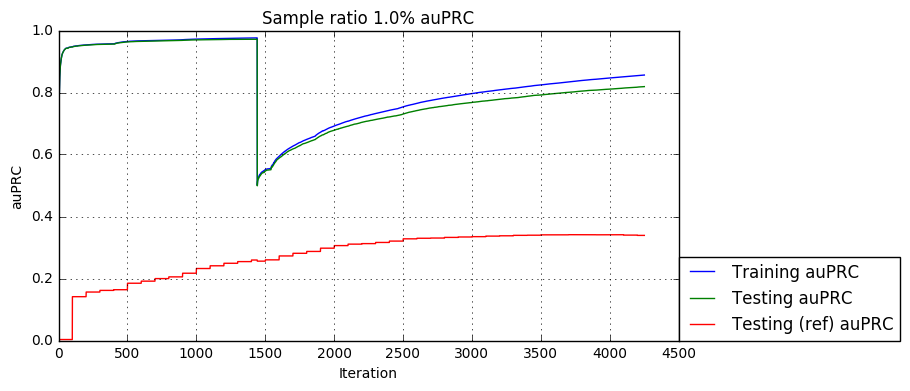

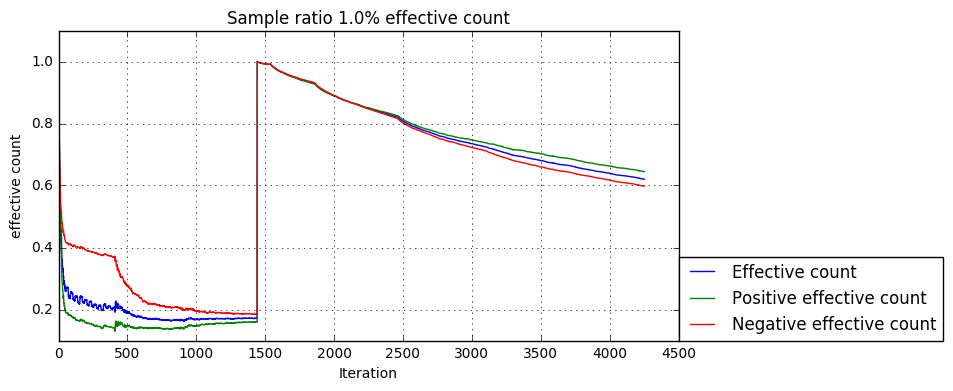

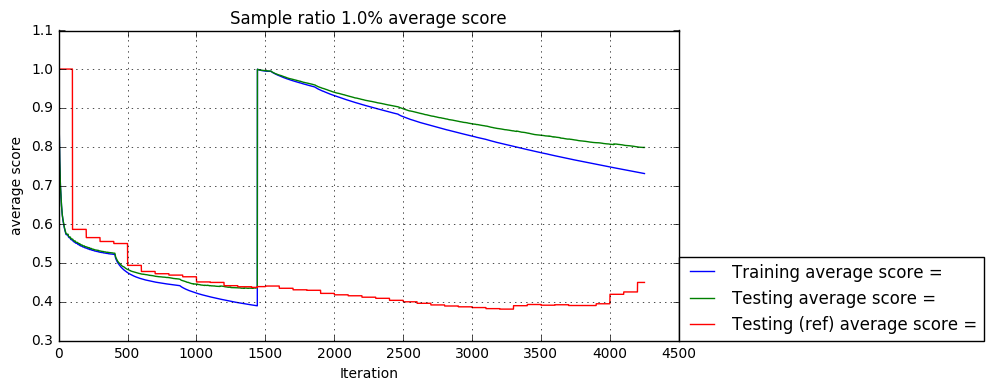

In [35]:
joint = joint1
ZOOM = False

sampleRatio = 1.0

if ZOOM:
    plot(zip(range(3), labels[:3]), joint, vlines=vlines,
         xlim=[90, 105], ylim=[0.0, 1.0])
    plot(zip(range(-3, 0), labels[-3:]), joint, vlines=vlines,
         xlim=[4000, 5500], ylim=[0.0, 1.0])
    plot(zip(range(3, len(labels), 3), labels[3:-3:3]), joint, vlines=vlines,
         xlim=[3349, 4300], ylim=[0.7, 0.85])
    # plot(zip(range(4, len(labels), 3), labels[4:-3:3]), joint, vlines=vlines,
    #      xlim=[0, 5000], ylim=[0.0, 1.0])
    # plot(zip(range(5, len(labels), 3), labels[5:-3:3]), joint, vlines=vlines,
    #      xlim=[0, 5000], ylim=[0.0, 1.0])
else:
    plot(zip(range(3), labels[:3]), joint, vlines=vlines,
         title="Sample ratio " + str(sampleRatio) + "% auPRC", xlabel="Iteration", ylabel="auPRC")  # auPRC
    plot(zip(range(-3, 0), labels[-3:]), joint, vlines=vlines,
         title="Sample ratio " + str(sampleRatio) + "% effective count",
         xlabel="Iteration", ylabel="effective count")  # auPRC
    plot(zip(range(3, len(labels), 3), labels[3:-3:3]), joint, vlines=vlines,
         title="Sample ratio " + str(sampleRatio) + "% average score",
         xlabel="Iteration", ylabel="average score")  # scores
    # plot(zip(range(4, len(labels), 3), labels[4:-3:3]), joint, vlines=vlines)  # scores (pos)
    # plot(zip(range(5, len(labels), 3), labels[5:-3:3]), joint, vlines=vlines)  # scores (neg)

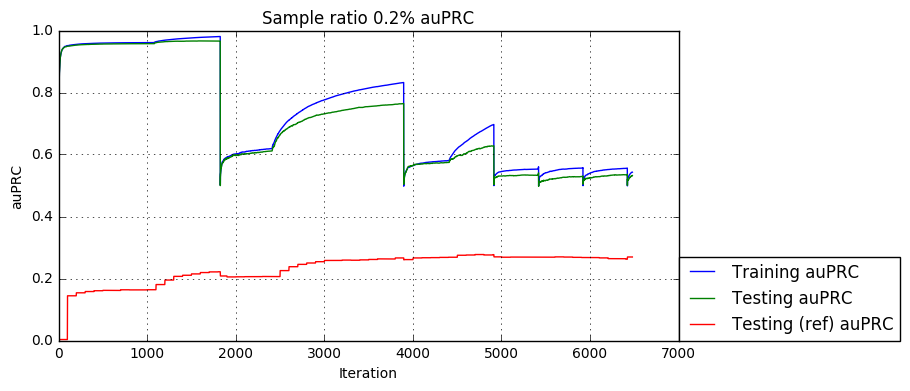

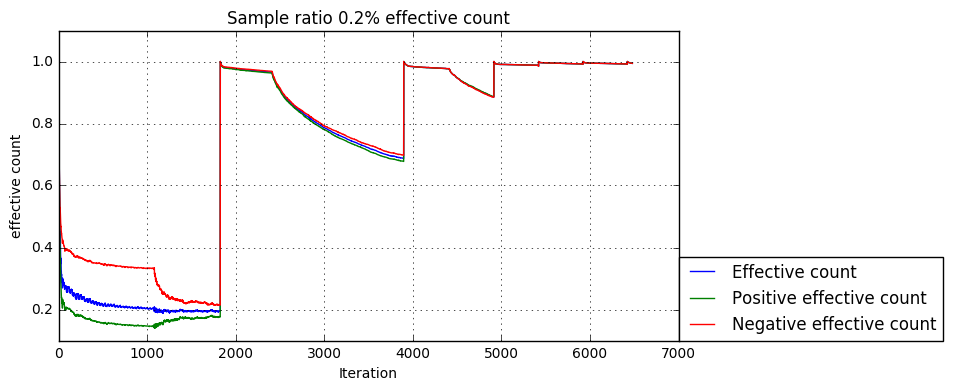

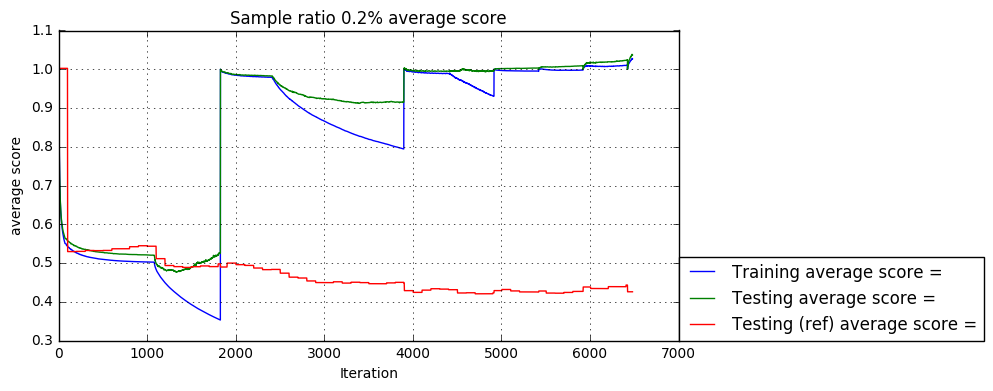

In [36]:
joint = joint2
ZOOM = False

sampleRatio = 0.2

if ZOOM:
    plot(zip(range(3), labels[:3]), joint, vlines=vlines,
         xlim=[90, 105], ylim=[0.0, 1.0])
    plot(zip(range(-3, 0), labels[-3:]), joint, vlines=vlines,
         xlim=[4000, 5500], ylim=[0.0, 1.0])
    plot(zip(range(3, len(labels), 3), labels[3:-3:3]), joint, vlines=vlines,
         xlim=[3349, 4300], ylim=[0.7, 0.85])
    # plot(zip(range(4, len(labels), 3), labels[4:-3:3]), joint, vlines=vlines,
    #      xlim=[0, 5000], ylim=[0.0, 1.0])
    # plot(zip(range(5, len(labels), 3), labels[5:-3:3]), joint, vlines=vlines,
    #      xlim=[0, 5000], ylim=[0.0, 1.0])
else:
    plot(zip(range(3), labels[:3]), joint, vlines=vlines,
         title="Sample ratio " + str(sampleRatio) + "% auPRC", xlabel="Iteration", ylabel="auPRC")  # auPRC
    plot(zip(range(-3, 0), labels[-3:]), joint, vlines=vlines,
         title="Sample ratio " + str(sampleRatio) + "% effective count",
         xlabel="Iteration", ylabel="effective count")  # auPRC
    plot(zip(range(3, len(labels), 3), labels[3:-3:3]), joint, vlines=vlines,
         title="Sample ratio " + str(sampleRatio) + "% average score",
         xlabel="Iteration", ylabel="average score")  # scores
    # plot(zip(range(4, len(labels), 3), labels[4:-3:3]), joint, vlines=vlines)  # scores (pos)
    # plot(zip(range(5, len(labels), 3), labels[5:-3:3]), joint, vlines=vlines)  # scores (neg)